In [1]:
!pip install pydotplus
from IPython.display import Image
from itertools import combinations
from itertools import product
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import kpss, adfuller
import matplotlib.pyplot as plt
import numpy as np
import os
import os as os
import pandas as pd
import pydotplus
import random
import scipy.stats as ss
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Dataset upload

In [3]:
df = pd.read_excel('datam.XLSX')
with pd.option_context('display.max_rows', None):
  display(df)
df.head()


,Salary,Role,Total_Exp,Otg_Job_Exp,Other_Exp,Master_Degree,Club_Membership,Preferred_Job_Location,English_Level,Other_Languages,University_Degree,Hobbies,License_Certificate,Tec_Talents
0,34000,Data_Scientist,1.0,1.0,0.0,No,Yes,Remote,Full_Professional,German,2.65,Yes,Yes,1
1,36000,Data_Scientist,1.5,1.5,0.0,NaN,No,Hybrid,Limited_Working,NaN,3.15,NaN,NaN,1
2,50000,Senior_Data_Scientist,7.0,NaN,NaN,No,Yes,NaN,Full_Professional,German,2.95,Yes,Yes,3
3,72000,Architect,12.0,10.0,2.0,Yes,No,Hybrid,Limited_Working,Dutch,2.95,NaN,NaN,3
4,53000,Senior_Data_Scientist,8.0,4.0,4.0,No,NaN,Remote,Full_Professional,Dutch,2.80,Yes,Yes,2
5,35500,Data_Scientist,1.5,1.5,0.0,No,No,On_Location,Full_Professional,NaN,NaN,NaN,Yes,1
6,77000,Architect,14.0,8.0,6.0,NaN,Yes,NaN,Full_Professional,German,3.35,NaN,NaN,3
7,51000,Senior_Data_Scientist,6.5,3.0,3.5,No,No,Remote,Full_Professional,German,3.65,Yes,Yes,2
8,41000,Data_Scientist,4.0,2.0,2.0,Yes,Yes,On_Location,Native_or_Bilingual,German,3.10,NaN,NaN,1
9,74000,Architect,13.0,8.0,5.0,Yes,No,Hybrid,Native_or_Bilingual,Spanish,2.65,NaN,Yes,3


,Salary,Role,Total_Exp,Otg_Job_Exp,Other_Exp,Master_Degree,Club_Membership,Preferred_Job_Location,English_Level,Other_Languages,University_Degree,Hobbies,License_Certificate,Tec_Talents
0,34000,Data_Scientist,1.0,1.0,0.0,No,Yes,Remote,Full_Professional,German,2.65,Yes,Yes,1
1,36000,Data_Scientist,1.5,1.5,0.0,NaN,No,Hybrid,Limited_Working,NaN,3.15,NaN,NaN,1
2,50000,Senior_Data_Scientist,7.0,NaN,NaN,No,Yes,NaN,Full_Professional,German,2.95,Yes,Yes,3
3,72000,Architect,12.0,10.0,2.0,Yes,No,Hybrid,Limited_Working,Dutch,2.95,NaN,NaN,3
4,53000,Senior_Data_Scientist,8.0,4.0,4.0,No,NaN,Remote,Full_Professional,Dutch,2.80,Yes,Yes,2


In [4]:
# Analysing the data - empty registration amounts

In [5]:
display(df.isna().sum())

Salary                      0
Role                        0
Total_Exp                   0
Otg_Job_Exp                14
Other_Exp                  14
Master_Degree              10
Club_Membership            38
Preferred_Job_Location     44
English_Level               0
Other_Languages            20
University_Degree          10
Hobbies                   165
License_Certificate       171
Tec_Talents                 0
dtype: int64

In [6]:
# Data types

In [7]:
df.dtypes

Salary                      int64
Role                       object
Total_Exp                 float64
Otg_Job_Exp               float64
Other_Exp                 float64
Master_Degree              object
Club_Membership            object
Preferred_Job_Location     object
English_Level              object
Other_Languages            object
University_Degree         float64
Hobbies                    object
License_Certificate        object
Tec_Talents                 int64
dtype: object

In [8]:
# Categorical variable analysis

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        print(f'Analysis for {col}:')
        print(f'Number of unique categories: {df[col].nunique()}')
        print('Frequency of each category:')
        print(df[col].value_counts())
        print(f'Most frequent category: {df[col].mode().values[0]}')
        print('-' * 40)

Analysis for Role:
Number of unique categories: 3
Frequency of each category:
Role
Data_Scientist           212
Senior_Data_Scientist     86
Architect                 72
Name: count, dtype: int64
Most frequent category: Data_Scientist
----------------------------------------
Analysis for Master_Degree:
Number of unique categories: 2
Frequency of each category:
Master_Degree
No     262
Yes     98
Name: count, dtype: int64
Most frequent category: No
----------------------------------------
Analysis for Club_Membership:
Number of unique categories: 2
Frequency of each category:
Club_Membership
Yes    172
No     160
Name: count, dtype: int64
Most frequent category: Yes
----------------------------------------
Analysis for Preferred_Job_Location:
Number of unique categories: 3
Frequency of each category:
Preferred_Job_Location
Remote         162
Hybrid          91
On_Location     73
Name: count, dtype: int64
Most frequent category: Remote
----------------------------------------
Analysis fo

In [10]:
# Numerical variable analysis

In [11]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
        print(f'Analysis for {col}:')
        print(f'Minimum value: {df[col].min()}')
        print(f'Maximum value: {df[col].max()}')
        print(f'Mean: {df[col].mean()}')
        print(f'Median: {df[col].median()}')
        print(f'Standard deviation: {df[col].std()}')
        # You can add more statistics or visualizations here, such as histograms or box plots
        print('-' * 40)

Analysis for Salary:
Minimum value: 29950
Maximum value: 95000
Mean: 49768.52702702703
Median: 38825.0
Standard deviation: 16823.25015340973
----------------------------------------
Analysis for Total_Exp:
Minimum value: 0.5
Maximum value: 17.0
Mean: 6.121621621621622
Median: 4.5
Standard deviation: 4.143439986797506
----------------------------------------
Analysis for Otg_Job_Exp:
Minimum value: 0.0
Maximum value: 15.0
Mean: 3.1264044943820224
Median: 2.0
Standard deviation: 2.578793143735445
----------------------------------------
Analysis for Other_Exp:
Minimum value: 0.0
Maximum value: 13.0
Mean: 3.056179775280899
Median: 2.5
Standard deviation: 2.9933618598371727
----------------------------------------
Analysis for University_Degree:
Minimum value: 2.5
Maximum value: 3.9
Mean: 2.85
Median: 2.75
Standard deviation: 0.26872752869712746
----------------------------------------
Analysis for Tec_Talents:
Minimum value: 1
Maximum value: 3
Mean: 1.6891891891891893
Median: 1.0
Standard

In [12]:
#Manuplate the data

In [13]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]  # Filter out variables with zero missing values
display(missing_values)

Otg_Job_Exp                14
Other_Exp                  14
Master_Degree              10
Club_Membership            38
Preferred_Job_Location     44
Other_Languages            20
University_Degree          10
Hobbies                   165
License_Certificate       171
dtype: int64

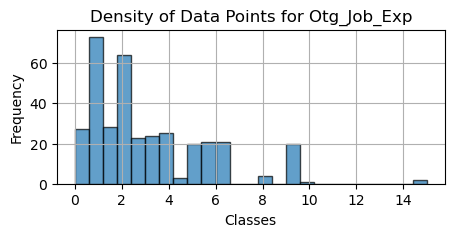

In [14]:
# Otg_Job_Exp - Experience in present job

plt.figure(figsize=(5, 2))
df['Otg_Job_Exp'].hist(bins=25, edgecolor='black', alpha=0.7)
plt.title('Density of Data Points for Otg_Job_Exp')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
median_Otg_Job_Exp = df['Otg_Job_Exp'].median()

df['Otg_Job_Exp'] = df['Otg_Job_Exp'].fillna(median_Otg_Job_Exp)

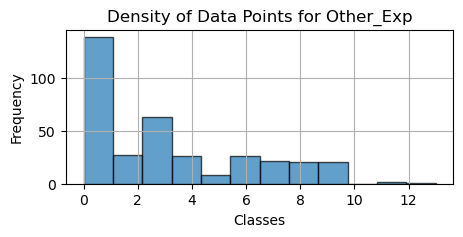

In [16]:
# Other_Exp

plt.figure(figsize=(5, 2))
df['Other_Exp'].hist(bins=12, edgecolor='black', alpha=0.7)
plt.title('Density of Data Points for Other_Exp')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
median_Other_Exp = df['Other_Exp'].median()

df['Other_Exp'] = df['Other_Exp'].fillna(median_Other_Exp)

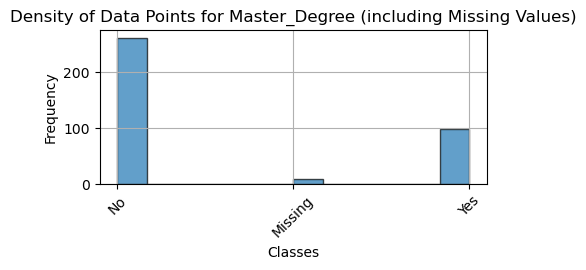

In [18]:
# Master_Degree

df['Master_Degree'] = df['Master_Degree'].fillna('Missing')

plt.figure(figsize=(5, 2))
df['Master_Degree'].hist(bins=12, edgecolor='black', alpha=0.7)

plt.xticks(rotation=45)  
plt.title('Density of Data Points for Master_Degree (including Missing Values)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
df['Master_Degree'] = df['Master_Degree'].replace('Missing', 'No')

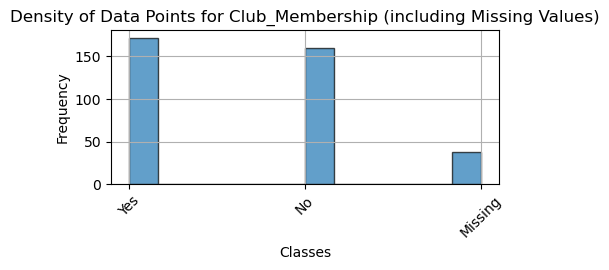

In [20]:
# Club_Membership

df['Club_Membership'] = df['Club_Membership'].fillna('Missing')


plt.figure(figsize=(5, 2))
df['Club_Membership'].hist(bins=12, edgecolor='black', alpha=0.7)

plt.xticks(rotation=45)  
plt.title('Density of Data Points for Club_Membership (including Missing Values)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:

df['Club_Membership'] = df['Club_Membership'].replace('Missing', 'No')

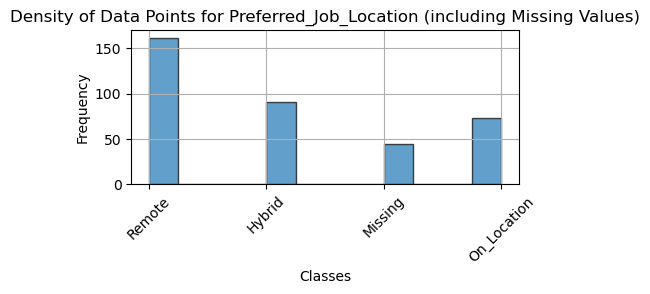

In [22]:
# Preferred_Job_Location

df['Preferred_Job_Location'] = df['Preferred_Job_Location'].fillna('Missing')

plt.figure(figsize=(5, 2))
df['Preferred_Job_Location'].hist(bins=12, edgecolor='black', alpha=0.7)

plt.xticks(rotation=45)  
plt.title('Density of Data Points for Preferred_Job_Location (including Missing Values)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
most_common_location = df['Preferred_Job_Location'].mode()[0]
df['Preferred_Job_Location'] = df['Preferred_Job_Location'].replace('Missing', most_common_location)

In [24]:
df['Other_Languages'] = df['Other_Languages'].fillna('None')

In [25]:
median_degree = df['University_Degree'].median()

df['University_Degree'] = df['University_Degree'].fillna(median_degree)


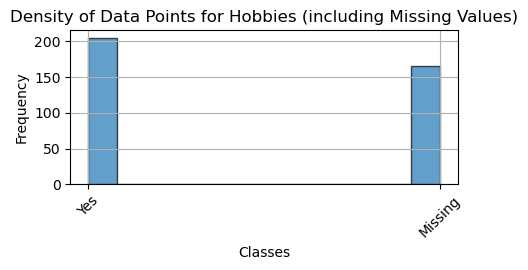

In [26]:
# Hobbies

df['Hobbies'] = df['Hobbies'].fillna('Missing')

plt.figure(figsize=(5, 2))
df['Hobbies'].hist(bins=12, edgecolor='black', alpha=0.7)

plt.xticks(rotation=45)  
plt.title('Density of Data Points for Hobbies (including Missing Values)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
df['Hobbies'] = df['Hobbies'].replace('Missing', 'No')

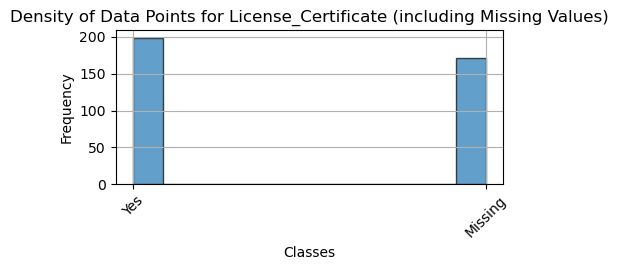

In [28]:
# License_Certificate

df['License_Certificate'] = df['License_Certificate'].fillna('Missing')

plt.figure(figsize=(5, 2))
df['License_Certificate'].hist(bins=12, edgecolor='black', alpha=0.7)

plt.xticks(rotation=45)  
plt.title('Density of Data Points for License_Certificate (including Missing Values)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
df['License_Certificate'] = df['License_Certificate'].replace('Missing', 'No')

In [32]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [33]:
# LINEARITY

Rainbow Test Results for Total_Exp:
Rainbow Statistic: 2.3677239211145875
p-value: 4.551390646958348e-09
Result: Reject Null Hypothesis
--------------------------------------------------


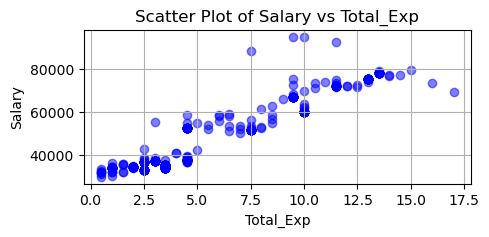

Rainbow Test Results for Otg_Job_Exp:
Rainbow Statistic: 1.228435085786299
p-value: 0.08200081487562999
Result: Fail to Reject Null Hypothesis
--------------------------------------------------


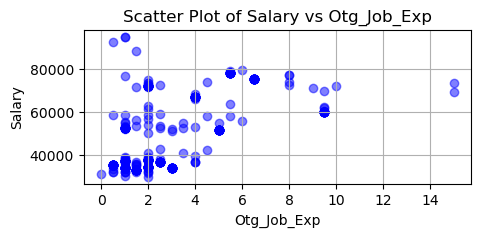

Rainbow Test Results for Other_Exp:
Rainbow Statistic: 1.2946379486456374
p-value: 0.040413015461428
Result: Reject Null Hypothesis
--------------------------------------------------


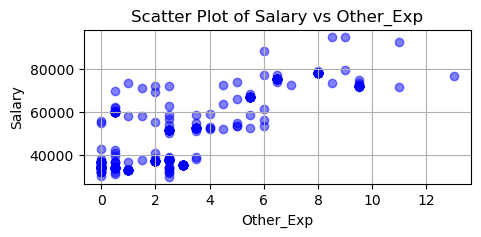

Rainbow Test Results for University_Degree:
Rainbow Statistic: 1.1551223291362152
p-value: 0.16455817743448656
Result: Fail to Reject Null Hypothesis
--------------------------------------------------


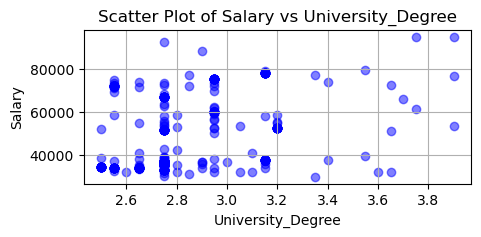

Rainbow Test Results for Tec_Talents:
Rainbow Statistic: 1.0004579163142053
p-value: 0.498869622343935
Result: Fail to Reject Null Hypothesis
--------------------------------------------------


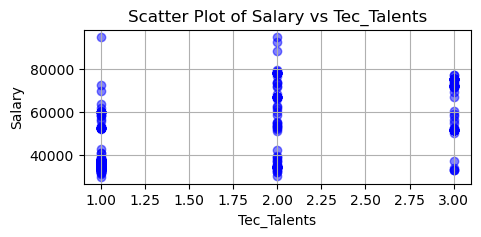

In [34]:
# RAINBOW TEST

for col in numeric_columns:
    if col != 'Salary': 
       
        X = df[col]
        y = df['Salary']
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        
        rainbow_statistic, rainbow_p_value = sm.stats.diagnostic.linear_rainbow(model)
        
        print(f'Rainbow Test Results for {col}:')
        print(f'Rainbow Statistic: {rainbow_statistic}')
        print(f'p-value: {rainbow_p_value}')
        print(f'Result: {"Reject Null Hypothesis" if rainbow_p_value < 0.05 else "Fail to Reject Null Hypothesis"}')
        print('-' * 50)
        
        # SCATTER PLOT ANALİZİ
        
        plt.figure(figsize=(5, 2))
        plt.scatter(df[col], df['Salary'], color='blue', alpha=0.5)
        plt.title(f'Scatter Plot of Salary vs {col}')
        plt.xlabel(col)
        plt.ylabel('Salary')
        plt.grid(True)
        plt.show()

Salary                      int64
Role                       object
Total_Exp                 float64
Otg_Job_Exp               float64
Other_Exp                 float64
Master_Degree              object
Club_Membership            object
Preferred_Job_Location     object
English_Level              object
Other_Languages            object
University_Degree         float64
Hobbies                    object
License_Certificate        object
Tec_Talents                 int64
dtype: object


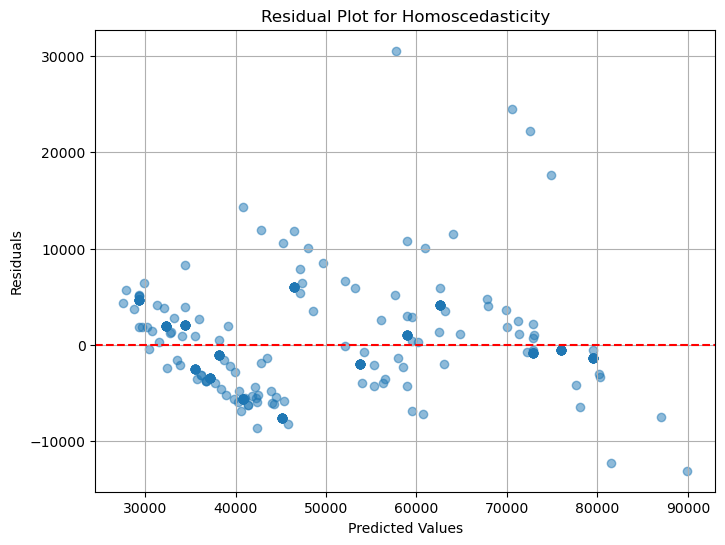

In [36]:
# RESIDUAL PLOT 

print(df.dtypes)

df_numeric = df.select_dtypes(include=['number'])

X = df_numeric.drop(['Salary'], axis=1)
y = df['Salary']

model = sm.OLS(y, sm.add_constant(X)).fit()

residuals = model.resid

plt.figure(figsize=(8, 6))
plt.scatter(model.predict(), residuals, alpha=0.5)
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [37]:
# DURBIN WATSON TEST

durbin_watson_statistic = durbin_watson(residuals)

print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

Durbin-Watson Statistic: 2.344135419593445


In [38]:
# HOMOSCEDASTICITY

In [39]:
# BREUSCH-PAGAN TEST

lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model.resid, model.model.exog)

print(f'Breusch-Pagan Test Results:')
print(f'Lagrange Multiplier p-value: {lm_p_value}')
print(f'F-statistic p-value: {f_p_value}')

Breusch-Pagan Test Results:
Lagrange Multiplier p-value: 1.6830570961880875e-06
F-statistic p-value: 9.268363077459246e-07


In [40]:
# WHITE TEST

white_test_results = het_white(model.resid, model.model.exog)

print(f'White Test Results:')
print(f'LM Statistic: {white_test_results[0]}')
print(f'LM-Test p-value: {white_test_results[1]}')
print(f'F-statistic p-value: {white_test_results[2]}')

White Test Results:
LM Statistic: 105.84713044875008
LM-Test p-value: 1.1160877881023217e-13
F-statistic p-value: 6.992286055678584


In [41]:
# NORMALITY OF ERRORS

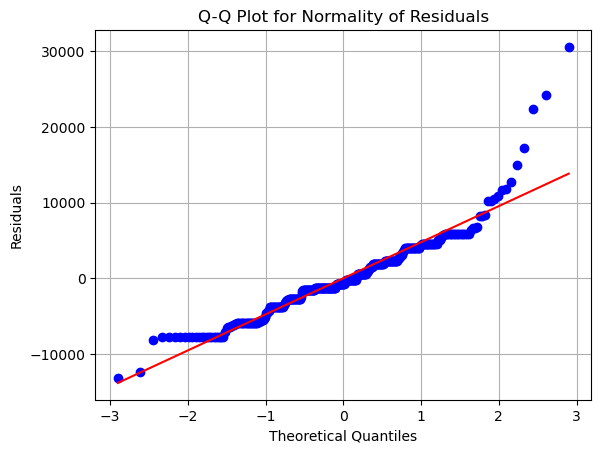

In [42]:
#Q-Q PLOT 

float64_columns = df.select_dtypes(include=['float64']).columns.tolist()

if 'Salary' in float64_columns:
    float64_columns.remove('Salary')

X = df[float64_columns]
y = df['Salary']

model = sm.OLS(y, sm.add_constant(X)).fit()

residuals = model.resid

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [43]:
# SHAPIRO-WILK TEST

shapiro_test_statistic, shapiro_p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test Results:')
print(f'Test Statistic: {shapiro_test_statistic}')
print(f'p-value: {shapiro_p_value}')

Shapiro-Wilk Test Results:
Test Statistic: 0.918536365032196
p-value: 2.8266004445907933e-13


In [44]:
# KOLMOGOROV-SMIRNOV TEST

ks_test_statistic, ks_p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test Results:')
print(f'Test Statistic: {ks_test_statistic}')
print(f'p-value: {ks_p_value}')

Kolmogorov-Smirnov Test Results:
Test Statistic: 0.5648648648648649
p-value: 5.889350061409986e-112


In [45]:
# MULTICOLLINEARITY

In [46]:
# CORRELATION MATRIX

float64_columns = df.select_dtypes(include=[('float64'),('int64')]).columns.tolist()

if 'Salary' in float64_columns:
    float64_columns.remove('Salary')

X = df[float64_columns]

correlation_matrix = X.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Total_Exp  Otg_Job_Exp  Other_Exp  University_Degree  \
Total_Exp           1.000000     0.691912   0.777712           0.258538   
Otg_Job_Exp         0.691912     1.000000   0.118243           0.115109   
Other_Exp           0.777712     0.118243   1.000000           0.273922   
University_Degree   0.258538     0.115109   0.273922           1.000000   
Tec_Talents         0.612701     0.369862   0.540698          -0.094716   

                   Tec_Talents  
Total_Exp             0.612701  
Otg_Job_Exp           0.369862  
Other_Exp             0.540698  
University_Degree    -0.094716  
Tec_Talents           1.000000  


In [47]:
#  VARIANCE INFLATION FACTORS (VIF)

float64_columns = df.select_dtypes(include=[('float64'),('int64')]).columns.tolist()

if 'Salary' in float64_columns:
    float64_columns.remove('Salary')

X = df[float64_columns]

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
            Variable         VIF
0          Total_Exp  106.089834
1        Otg_Job_Exp   33.206913
2          Other_Exp   36.802205
3  University_Degree    5.387143
4        Tec_Talents    8.036249


In [48]:
# IQR ANALYSIS

if 'Salary' in df.columns:
    ANALIZ = df.select_dtypes(include=['number']).drop(['Salary'], axis=1)
else:
    ANALIZ = df.select_dtypes(include=['number'])


ANALIZ = ANALIZ.apply(pd.to_numeric, errors='coerce')

def deger_hesaplama(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    median = column.median()
    minimum = column.min()
    maximum = column.max()
    IQRU = ((q3 - q1) * 5) + median # upper band için hesaplama
    IQRL = median - ((q3 - q1) * 5) # lower band için hesaplama
    IQR = q3 - q1
    LT = q1 - (1.5 * IQR) # lower threshold
    UT = q3 + (1.5 * IQR) # Upper threshold
    
    return q1, q3, median, minimum, maximum, IQRU, IQRL, IQR, LT, UT

analiz_degerler = {}

for degisken in ANALIZ.columns:
    q1, q3, median, minimum, maximum, IQRU, IQRL, IQR, LT, UT = deger_hesaplama(ANALIZ[degisken])
    analiz_degerler[degisken] = {'Q1': q1,
                               'Q3': q3,
                               'Median': median,
                               'Minimum': minimum,
                               'Maximum': maximum,
                               'IQRU': IQRU,
                               'IQRL': IQRL,
                               'IQR': IQR,
                               'LT': LT,
                               'UT': UT}

for degisken, deger in analiz_degerler.items():
    print(f"Degisken: {degisken}")
    print(f"Q1: {deger['Q1']}")
    print(f"Q3: {deger['Q3']}")
    print(f"Median: {deger['Median']}")
    print(f"Minimum: {deger['Minimum']}")
    print(f"Maximum: {deger['Maximum']}")
    print(f"IQRU: {deger['IQRU']}")
    print(f"IQRL: {deger['IQRL']}")
    print(f"IQR: {deger['IQR']}")
    print(f"LT: {deger['LT']}")
    print(f"LT: {deger['UT']}")
    print("-" * 20)
    
IQR_S_SONUC = pd.DataFrame(analiz_degerler).T

print(IQR_S_SONUC)

IQR_S_SONUC.to_excel('IQR_S_SONUC.xlsx', index_label='Degisken')

Degisken: Total_Exp
Q1: 2.5
Q3: 9.5
Median: 4.5
Minimum: 0.5
Maximum: 17.0
IQRU: 39.5
IQRL: -30.5
IQR: 7.0
LT: -8.0
LT: 20.0
--------------------
Degisken: Otg_Job_Exp
Q1: 1.0
Q3: 4.0
Median: 2.0
Minimum: 0.0
Maximum: 15.0
IQRU: 17.0
IQRL: -13.0
IQR: 3.0
LT: -3.5
LT: 8.5
--------------------
Degisken: Other_Exp
Q1: 0.5
Q3: 5.375
Median: 2.5
Minimum: 0.0
Maximum: 13.0
IQRU: 26.875
IQRL: -21.875
IQR: 4.875
LT: -6.8125
LT: 12.6875
--------------------
Degisken: University_Degree
Q1: 2.75
Q3: 2.95
Median: 2.75
Minimum: 2.5
Maximum: 3.9
IQRU: 3.750000000000001
IQRL: 1.7499999999999991
IQR: 0.20000000000000018
LT: 2.4499999999999997
LT: 3.2500000000000004
--------------------
Degisken: Tec_Talents
Q1: 1.0
Q3: 2.0
Median: 1.0
Minimum: 1
Maximum: 3
IQRU: 6.0
IQRL: -4.0
IQR: 1.0
LT: -0.5
LT: 3.5
--------------------
                     Q1     Q3  Median  Minimum  Maximum    IQRU    IQRL  \
Total_Exp          2.50  9.500    4.50      0.5     17.0  39.500 -30.500   
Otg_Job_Exp        1.00  4.00

In [49]:
# IQR CAPING

numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    if column != 'Salary':
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        
    
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
df.head()

,Salary,Role,Total_Exp,Otg_Job_Exp,Other_Exp,Master_Degree,Club_Membership,Preferred_Job_Location,English_Level,Other_Languages,University_Degree,Hobbies,License_Certificate,Tec_Talents
0,34000,Data_Scientist,1.0,1.0,0.0,No,Yes,Remote,Full_Professional,German,2.65,Yes,Yes,1
1,36000,Data_Scientist,1.5,1.5,0.0,No,No,Hybrid,Limited_Working,None,3.15,No,No,1
2,50000,Senior_Data_Scientist,7.0,2.0,2.5,No,Yes,Remote,Full_Professional,German,2.95,Yes,Yes,3
3,72000,Architect,12.0,8.5,2.0,Yes,No,Hybrid,Limited_Working,Dutch,2.95,No,No,3
4,53000,Senior_Data_Scientist,8.0,4.0,4.0,No,No,Remote,Full_Professional,Dutch,2.80,Yes,Yes,2


In [50]:
#Z Scale in NUMERICAL DESCRIPTIVE VARIABLES
from sklearn.preprocessing import StandardScaler

independent_variables = df.select_dtypes(include=['number']).columns

df_scaled = df.copy()

scaler = StandardScaler()

for col in independent_variables:
    if col != 'Salary':
        if df[col].dtype in ['int64', 'float64']:
            df_scaled[col] = scaler.fit_transform(df[[col]])

df = df_scaled
df.head()

,Salary,Role,Total_Exp,Otg_Job_Exp,Other_Exp,Master_Degree,Club_Membership,Preferred_Job_Location,English_Level,Other_Languages,University_Degree,Hobbies,License_Certificate,Tec_Talents
0,34000,Data_Scientist,-1.237753,-0.878892,-1.035187,No,Yes,Remote,Full_Professional,German,-0.815115,Yes,Yes,-0.864307
1,36000,Data_Scientist,-1.116917,-0.658275,-1.035187,No,No,Hybrid,Limited_Working,None,1.437256,No,No,-0.864307
2,50000,Senior_Data_Scientist,0.212280,-0.437657,-0.182280,No,Yes,Remote,Full_Professional,German,0.536308,Yes,Yes,1.643879
3,72000,Architect,1.420640,2.430369,-0.352861,Yes,No,Hybrid,Limited_Working,Dutch,0.536308,No,No,1.643879
4,53000,Senior_Data_Scientist,0.453952,0.444812,0.329464,No,No,Remote,Full_Professional,Dutch,-0.139403,Yes,Yes,0.389786


In [51]:
# ASSIGNING DUMMY VARIABLES TO CATEGORICAL VARIABLES

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col)
    
    dummies = dummies.astype('int64')
    
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns=[col])
df.head()

,Salary,Total_Exp,Otg_Job_Exp,Other_Exp,University_Degree,Tec_Talents,Role_Architect,Role_Data_Scientist,Role_Senior_Data_Scientist,Master_Degree_No,...,Other_Languages_Dutch,Other_Languages_French,Other_Languages_German,Other_Languages_Japanese,Other_Languages_None,Other_Languages_Spanish,Hobbies_No,Hobbies_Yes,License_Certificate_No,License_Certificate_Yes
0,34000,-1.237753,-0.878892,-1.035187,-0.815115,-0.864307,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
1,36000,-1.116917,-0.658275,-1.035187,1.437256,-0.864307,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
2,50000,0.212280,-0.437657,-0.182280,0.536308,1.643879,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
3,72000,1.420640,2.430369,-0.352861,0.536308,1.643879,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,53000,0.453952,0.444812,0.329464,-0.139403,0.389786,0,0,1,1,...,1,0,0,0,0,0,0,1,0,1


In [52]:
df.to_excel("Final_Manipulated_Df.xlsx", index=False)

In [53]:
# CORRELATION BETWEEN INDEPENDENT VARIABLES

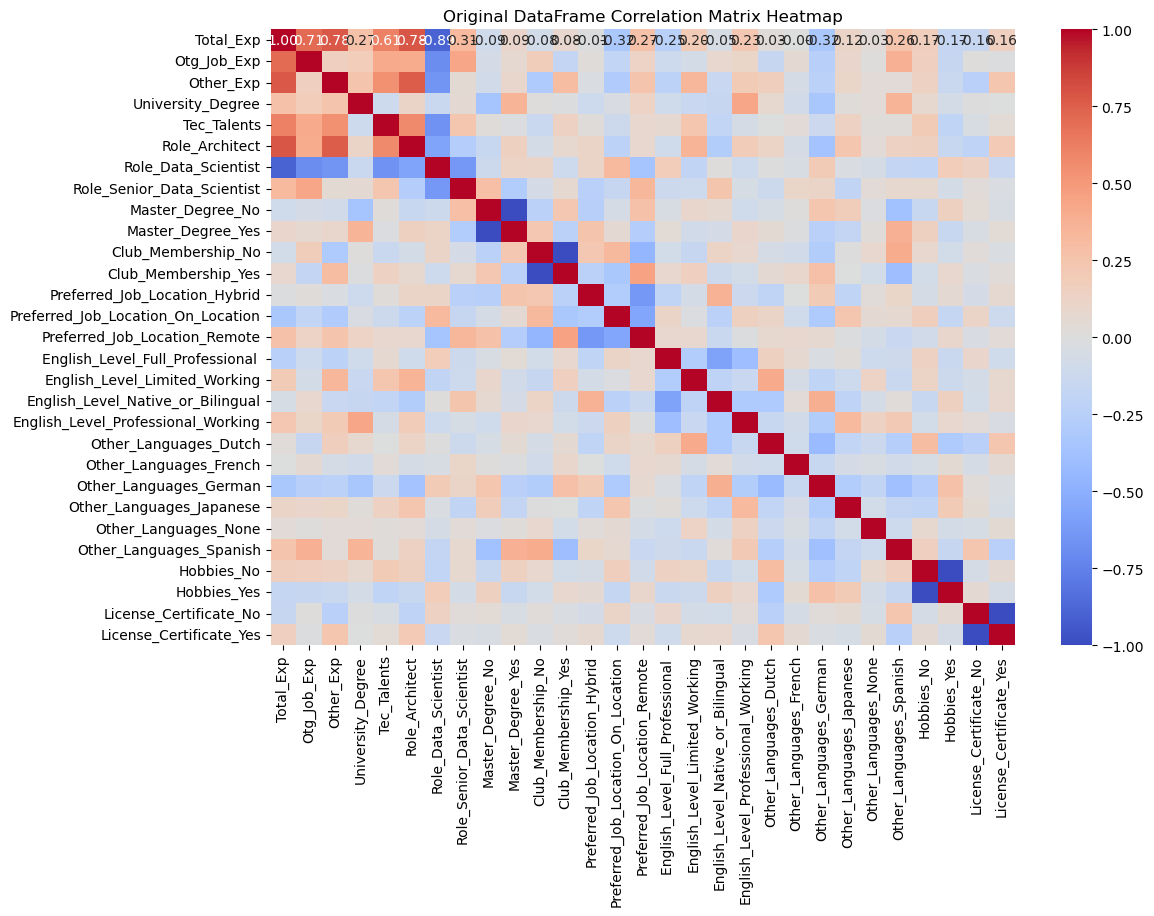

In [54]:
correlation_matrix = df.drop(columns=['Salary']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Original DataFrame Correlation Matrix Heatmap')
plt.show()

In [55]:
correlation_matrix.to_excel("correlation_matrix.xlsx")

In [56]:
correlation_pairs = []
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        variable1 = correlation_matrix.index[i]
        variable2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        correlation_pairs.append((variable1, variable2, correlation))

correlation_pairs_df = pd.DataFrame(correlation_pairs, columns=['Variable1', 'Variable2', 'Correlation'])

# Exclude Salary from the correlation pairs
correlation_pairs_df = correlation_pairs_df[
    (~correlation_pairs_df['Variable1'].isin(['Salary'])) &
    (~correlation_pairs_df['Variable2'].isin(['Salary']))
]

correlation_threshold = 0.8
high_correlation_pairs = correlation_pairs_df[correlation_pairs_df['Correlation'].abs() > correlation_threshold]
low_correlation_pairs = correlation_pairs_df[correlation_pairs_df['Correlation'].abs() <= correlation_threshold]

high_correlation_pairs = high_correlation_pairs.sort_values(by='Correlation', ascending=False)
low_correlation_pairs = low_correlation_pairs.sort_values(by='Correlation')

high_correlation_pairs.to_excel("high_correlation_pairs.xlsx", index=False)
low_correlation_pairs.to_excel("low_correlation_pairs.xlsx", index=False)

In [57]:
correlation_threshold = 0.8
correlated_pairs = correlation_pairs_df[
    (correlation_pairs_df['Correlation'].abs() > correlation_threshold) & 
    (~correlation_pairs_df['Variable1'].isin(['Salary'])) & 
    (~correlation_pairs_df['Variable2'].isin(['Salary']))
]

# Print correlated variable pairs to the output screen
print("Correlated Variable Pairs:")
for index, row in correlated_pairs.iterrows():
    print(f"{row['Variable1']} - {row['Variable2']} (Correlation: {row['Correlation']})")

Correlated Variable Pairs:
Total_Exp - Role_Data_Scientist (Correlation: -0.8943362400660564)
Master_Degree_No - Master_Degree_Yes (Correlation: -1.0000000000000002)
Club_Membership_No - Club_Membership_Yes (Correlation: -0.9999999999999999)
Hobbies_No - Hobbies_Yes (Correlation: -0.9999999999999999)
License_Certificate_No - License_Certificate_Yes (Correlation: -1.0)


In [59]:
# Define correlation thresholds
lower_threshold = 0.7
upper_threshold = 0.8

correlated_pairs_07_08 = correlation_pairs_df[
    (correlation_pairs_df['Correlation'].abs() >= lower_threshold) &
    (correlation_pairs_df['Correlation'].abs() < upper_threshold) &
    (~correlation_pairs_df['Variable1'].isin(['Salary'])) &
    (~correlation_pairs_df['Variable2'].isin(['Salary']))
]

# Print correlated variable pairs to the output screen
print("Correlated Variable Pairs between 0.7 and 0.8 abs:")
for index, row in correlated_pairs_07_08.iterrows():
    print(f"{row['Variable1']} - {row['Variable2']} (Correlation: {row['Correlation']})")

Correlated Variable Pairs between 0.7 and 0.8 abs:
Total_Exp - Otg_Job_Exp (Correlation: 0.7106632846250044)
Total_Exp - Other_Exp (Correlation: 0.7779128771322679)
Total_Exp - Role_Architect (Correlation: 0.7816193001300884)
Other_Exp - Role_Architect (Correlation: 0.7621231351223234)


In [60]:
# CORRELATION BETWEEN TARGET AND INDEPENDENT VARIABLES

In [61]:
# Exclude 'Salary' from the correlation matrix
correlation_matrix = df.corr()

# Extract correlations of each variable with 'Salary'
salary_correlations = correlation_matrix['Salary'].drop('Salary', errors='ignore')

# Write correlations to Excel
salary_correlations.to_excel("salary_correlations.xlsx", header=["Correlation"])

# Print correlations to the output screen
print("Correlations with Salary:")
for variable, correlation in salary_correlations.items():
    print(f"{variable}: {correlation:.2f}")

Correlations with Salary:
Total_Exp: 0.94
Otg_Job_Exp: 0.59
Other_Exp: 0.82
University_Degree: 0.31
Tec_Talents: 0.59
Role_Architect: 0.75
Role_Data_Scientist: -0.88
Role_Senior_Data_Scientist: 0.34
Master_Degree_No: -0.10
Master_Degree_Yes: 0.10
Club_Membership_No: -0.17
Club_Membership_Yes: 0.17
Preferred_Job_Location_Hybrid: -0.10
Preferred_Job_Location_On_Location: -0.32
Preferred_Job_Location_Remote: 0.34
English_Level_Full_Professional : -0.15
English_Level_Limited_Working: 0.20
English_Level_Native_or_Bilingual: -0.13
English_Level_Professional_Working: 0.19
Other_Languages_Dutch: 0.14
Other_Languages_French: -0.01
Other_Languages_German: -0.35
Other_Languages_Japanese: 0.12
Other_Languages_None: 0.07
Other_Languages_Spanish: 0.16
Hobbies_No: 0.22
Hobbies_Yes: -0.22
License_Certificate_No: -0.23
License_Certificate_Yes: 0.23


In [62]:
strong_correlations = salary_correlations[(salary_correlations.abs() > 0.8)]

strong_correlations.to_excel("strong_salary_correlations.xlsx", header=["Correlation"])

print("Strong Correlations with Salary:")
for variable, correlation in strong_correlations.items():
    print(f"{variable}: {correlation:.2f}")

Strong Correlations with Salary:
Total_Exp: 0.94
Other_Exp: 0.82
Role_Data_Scientist: -0.88


In [63]:
#ESTABLISHING THE LINEAR REGRESSION MODEL

In [64]:
# MODEL

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

X_columns = numeric_columns.drop('Salary')

X = df[X_columns]
y = df['Salary']

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features = X_columns[selected_indices]

# Train-test split with selected features
X_selected = X[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit model with selected features
model.fit(X_train_selected, y_train)

# Make predictions
predictions = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 21819242.62726221
Coefficients: [ 8398.05883632  4103.56481947 -8954.52535371 -2698.33182849
 -2877.69202385]
Intercept: 56123.59448211754


In [65]:
# Print selected feature names
print("Selected Feature Names:")
for feature in selected_features:
    print(feature)

# Print selected feature coefficients
print("\nSelected Feature Coefficients:")
for feature, coefficient in zip(selected_features, model.coef_):
    print(f"{feature}: {coefficient}")

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("\nR-squared of the model:", r_squared)

Selected Feature Names:
Total_Exp
Other_Exp
Role_Data_Scientist
English_Level_Limited_Working
Other_Languages_German

Selected Feature Coefficients:
Total_Exp: 8398.058836319657
Other_Exp: 4103.56481947382
Role_Data_Scientist: -8954.525353708026
English_Level_Limited_Working: -2698.3318284886086
Other_Languages_German: -2877.6920238454445

R-squared of the model: 0.9211315404759819


In [66]:
# Select numeric columns excluding 'Salary'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Salary')

# Exclude 'Salary' from RFE
X_columns = numeric_columns

X = df[X_columns]
y = df['Salary']

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features = X.columns[selected_indices]

# Ensure that 'Role_Data_Scientist', 'Role_Senior_Data_Scientist', and 'Role_Architect' are in selected features
mandatory_roles = ['Role_Data_Scientist', 'Role_Senior_Data_Scientist', 'Role_Architect']
selected_features = list(set(selected_features) | set(mandatory_roles))

# Train-test split with selected features
X_selected = X[selected_features]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit model with selected features
model.fit(X_train_selected, y_train)

# Make predictions
predictions = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

print("\nSelected Feature Names:")
for feature in selected_features:
    print(feature)

print("\nSelected Feature Coefficients:")
for feature, coefficient in zip(selected_features, model.coef_):
    print(f"{feature}: {coefficient}")

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("\nR-squared of the model:", r_squared)

Mean Squared Error: 21951769.26932734

Selected Feature Names:
Other_Exp
Role_Senior_Data_Scientist
Role_Architect
Other_Languages_German
Total_Exp
English_Level_Limited_Working
Role_Data_Scientist

Selected Feature Coefficients:
Other_Exp: 3981.5035668070677
Role_Senior_Data_Scientist: 2782.5177864979914
Role_Architect: 3923.009205002394
Other_Languages_German: -2838.578433786335
Total_Exp: 7916.13536341022
English_Level_Limited_Working: -2922.1686910039452
Role_Data_Scientist: -6705.526991500391

R-squared of the model: 0.9206525058786715


In [67]:
# Get the intercept of the model
intercept = model.intercept_

# Combine feature names with coefficients to form the equation
equation_parts = [f"{coefficient:.2f} * {feature}" for feature, coefficient in zip(selected_features, model.coef_)]

# Join equation parts into a single string
equation = f"Salary = {intercept:.2f} + {' + '.join(equation_parts)}"

# Print the equation
print("Equation of the model:")
print(equation)

Equation of the model:
Salary = 53434.36 + 3981.50 * Other_Exp + 2782.52 * Role_Senior_Data_Scientist + 3923.01 * Role_Architect + -2838.58 * Other_Languages_German + 7916.14 * Total_Exp + -2922.17 * English_Level_Limited_Working + -6705.53 * Role_Data_Scientist


In [68]:
# Define the selected features including mandatory roles
selected_features = ['Role_Architect', 'Role_Data_Scientist', 'Role_Senior_Data_Scientist',
                     'Other_Languages_German', 'English_Level_Limited_Working', 'Total_Exp']

# Extract the selected features and target variable
X = df[selected_features]
y = df['Salary']

# Initialize the model
model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features_rfe = X.columns[selected_indices]

# Train-test split with selected features
X_selected = X[selected_features_rfe]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit model with selected features
model.fit(X_train_selected, y_train)

# Make predictions
predictions = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

print("\nSelected Feature Names:")
for feature in selected_features_rfe:
    print(feature)

print("\nSelected Feature Coefficients:")
for feature, coefficient in zip(selected_features_rfe, model.coef_):
    print(f"{feature}: {coefficient}")

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print("\nR-squared of the model:", r_squared)

Mean Squared Error: 33300194.44133317

Selected Feature Names:
Role_Architect
Role_Data_Scientist
Role_Senior_Data_Scientist
Other_Languages_German
Total_Exp

Selected Feature Coefficients:
Role_Architect: 5581.402598541601
Role_Data_Scientist: -6956.420447741166
Role_Senior_Data_Scientist: 1375.0178491995598
Other_Languages_German: -2069.3171418976367
Total_Exp: 10624.813550955329

R-squared of the model: 0.8796321631184061


In [70]:
# Get all available features except 'Salary'
all_features = df.columns[df.columns != 'Salary']

# Generate combinations of features (excluding 'Salary') with length 5
feature_combinations = list(combinations(all_features, 5))

# Shuffle the combinations list to ensure randomness
random.shuffle(feature_combinations)

# Limit the number of iterations to a maximum of 100
if len(feature_combinations) > 100:
    feature_combinations = feature_combinations[:100]

# Initialize a list to store results
results = []

# Iterate over each combination
for idx, selected_features in enumerate(feature_combinations, start=1):
    print(f"\nCombination {idx}:")
    print("Selected Features:", selected_features)

    # Extract the selected features and target variable
    X = df[list(selected_features)]
    y = df['Salary']

    # Initialize the model
    model = LinearRegression()

    # Initialize RFE
    rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

    # Fit RFE
    rfe.fit(X, y)

    # Get selected feature indices
    selected_indices = rfe.support_

    # Get selected feature names
    selected_features_rfe = X.columns[selected_indices]

    # Train-test split with selected features
    X_selected = X[selected_features_rfe]
    X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Fit model with selected features
    model.fit(X_train_selected, y_train)

    # Make predictions
    predictions = model.predict(X_test_selected)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse)

    # Calculate R-squared
    r_squared = r2_score(y_test, predictions)
    print("R-squared of the model:", r_squared)

    # Store the results
    results.append((selected_features, r_squared))

# Sort the results based on R-squared values
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)


Combination 1:
Selected Features: ('University_Degree', 'Role_Senior_Data_Scientist', 'Master_Degree_No', 'Other_Languages_French', 'Other_Languages_None')
Mean Squared Error: 198234830.8018155
R-squared of the model: 0.2834547011357327

Combination 2:
Selected Features: ('Other_Exp', 'University_Degree', 'Role_Senior_Data_Scientist', 'Master_Degree_Yes', 'Preferred_Job_Location_Hybrid')
Mean Squared Error: 67656755.98640588
R-squared of the model: 0.7554459514386105

Combination 3:
Selected Features: ('Total_Exp', 'Master_Degree_No', 'Club_Membership_Yes', 'Other_Languages_None', 'License_Certificate_No')
Mean Squared Error: 36332019.65180185
R-squared of the model: 0.868673240850546

Combination 4:
Selected Features: ('Tec_Talents', 'Club_Membership_Yes', 'English_Level_Full_Professional ', 'English_Level_Native_or_Bilingual', 'Other_Languages_Japanese')
Mean Squared Error: 168527231.5070304
R-squared of the model: 0.3908366406723983

Combination 5:
Selected Features: ('Preferred_Jo

In [71]:
# Print the top 5 combinations
print("\nTop 5 Combinations:")
for idx, (features, r_squared) in enumerate(sorted_results[:5], start=1):
    print(f"\nTop {idx}:")
    print("Selected Features:", features)
    print("R-squared:", r_squared)


Top 5 Combinations:

Top 1:
Selected Features: ('Otg_Job_Exp', 'Other_Exp', 'Role_Architect', 'Role_Data_Scientist', 'Other_Languages_None')
R-squared: 0.8978488444859454

Top 2:
Selected Features: ('Total_Exp', 'Otg_Job_Exp', 'University_Degree', 'Preferred_Job_Location_Remote', 'Hobbies_No')
R-squared: 0.8965327164661724

Top 3:
Selected Features: ('Other_Exp', 'Role_Data_Scientist', 'Master_Degree_Yes', 'Preferred_Job_Location_On_Location', 'Other_Languages_Japanese')
R-squared: 0.8965290975048332

Top 4:
Selected Features: ('Other_Exp', 'Role_Architect', 'Role_Data_Scientist', 'Hobbies_Yes', 'License_Certificate_Yes')
R-squared: 0.8934603901432008

Top 5:
Selected Features: ('Total_Exp', 'University_Degree', 'Preferred_Job_Location_Hybrid', 'Hobbies_No', 'Hobbies_Yes')
R-squared: 0.8824621419010769


In [72]:
#Grid search 

In [73]:
# Get all available features except 'Salary'
all_features = df.columns[df.columns != 'Salary']

# Generate combinations of features (excluding 'Salary') with length 5
feature_combinations = list(combinations(all_features, 5))

# Shuffle the combinations list to ensure randomness
random.shuffle(feature_combinations)

# Limit the number of iterations to a maximum of 100
if len(feature_combinations) > 100:
    feature_combinations = feature_combinations[:100]

# Initialize a list to store results
results = []

# Iterate over each combination
for idx, selected_features in enumerate(feature_combinations, start=1):
    print(f"\nCombination {idx}:")
    print("Selected Features:", selected_features)

    # Extract the selected features and target variable
    X = df[list(selected_features)]
    y = df['Salary']

    # Initialize the model
    model = LinearRegression()

    # Initialize RFE
    rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

    # Fit RFE
    rfe.fit(X, y)

    # Get selected feature indices
    selected_indices = rfe.support_

    # Get selected feature names
    selected_features_rfe = X.columns[selected_indices]

    # Train-test split with selected features
    X_selected = X[selected_features_rfe]
    X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Define hyperparameters for grid search
    param_grid = {'fit_intercept': [True, False]}

    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_selected, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    predictions = best_model.predict(X_test_selected)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    print("Mean Squared Error:", mse)

    # Calculate R-squared
    r_squared = r2_score(y_test, predictions)
    print("R-squared of the model:", r_squared)

    # Store the results
    results.append((selected_features, r_squared))

# Sort the results based on R-squared values
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)


Combination 1:
Selected Features: ('Otg_Job_Exp', 'University_Degree', 'Preferred_Job_Location_On_Location', 'Preferred_Job_Location_Remote', 'Other_Languages_Dutch')
Mean Squared Error: 141166870.61575627
R-squared of the model: 0.4897341850271145

Combination 2:
Selected Features: ('University_Degree', 'Role_Data_Scientist', 'Role_Senior_Data_Scientist', 'Other_Languages_German', 'Hobbies_Yes')
Mean Squared Error: 33294048.929508526
R-squared of the model: 0.879654376861517

Combination 3:
Selected Features: ('Other_Exp', 'Role_Data_Scientist', 'Preferred_Job_Location_Hybrid', 'English_Level_Limited_Working', 'Other_Languages_Japanese')
Mean Squared Error: 34945883.4250452
R-squared of the model: 0.8736836085687242

Combination 4:
Selected Features: ('Tec_Talents', 'English_Level_Professional_Working', 'Other_Languages_French', 'License_Certificate_No', 'License_Certificate_Yes')
Mean Squared Error: 155035622.99993694
R-squared of the model: 0.4396037953180916

Combination 5:
Select

In [74]:
# Get the best combination and its corresponding R-squared value
best_features, best_r_squared = sorted_results[0]

# Extract the selected features and target variable
X = df[list(best_features)]
y = df['Salary']

# Initialize the model
best_model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=best_model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features_rfe = X.columns[selected_indices]

# Train-test split with selected features
X_selected = X[selected_features_rfe]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit model with selected features
best_model.fit(X_train_selected, y_train)

# Print the coefficients of the best model
print("Coefficients of the Best Model:")
for feature, coefficient in zip(selected_features_rfe, best_model.coef_):
    print(f"{feature}: {coefficient}")

# Calculate R-squared of the best model
predictions = best_model.predict(X_test_selected)
r_squared = r2_score(y_test, predictions)
print("\nR-squared of the Best Model:", r_squared)

Coefficients of the Best Model:
Otg_Job_Exp: 5406.556996511178
Other_Exp: 9209.145515622318
Role_Data_Scientist: -9961.371025608956
English_Level_Native_or_Bilingual: -1229.6857912197254
Other_Languages_Dutch: 3862.1586511382975

R-squared of the Best Model: 0.9076013791928268


In [75]:
# Get the best combination and its corresponding R-squared value
best_features, best_r_squared = sorted_results[0]

# Extract the selected features and target variable
X = df[list(best_features)]
y = df['Salary']

# Initialize the model
best_model = LinearRegression()

# Initialize RFE
rfe = RFE(estimator=best_model, n_features_to_select=5)  # Select top 5 features, you can adjust this value

# Fit RFE
rfe.fit(X, y)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features_rfe = X.columns[selected_indices]

# Train-test split with selected features
X_selected = X[selected_features_rfe]
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit model with selected features
best_model.fit(X_train_selected, y_train)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_selected, y, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())

# Print the coefficients of the best model
print("\nCoefficients of the Best Model:")
for feature, coefficient in zip(selected_features_rfe, best_model.coef_):
    print(f"{feature}: {coefficient}")

# Calculate R-squared of the best model
predictions = best_model.predict(X_test_selected)
r_squared = r2_score(y_test, predictions)
print("\nR-squared of the Best Model (Test Set):", r_squared)

Cross-Validation R-squared Scores: [0.79737406 0.9185605  0.945862   0.9579749  0.95688341]
Mean Cross-Validation R-squared: 0.9153309725808725

Coefficients of the Best Model:
Otg_Job_Exp: 5406.556996511178
Other_Exp: 9209.145515622318
Role_Data_Scientist: -9961.371025608956
English_Level_Native_or_Bilingual: -1229.6857912197254
Other_Languages_Dutch: 3862.1586511382975

R-squared of the Best Model (Test Set): 0.9076013791928268


In [76]:
# Initialize a list to store results for linear regression and random forest
results_lr = []
results_rf = []

# Iterate over each combination
for idx, selected_features in enumerate(feature_combinations, start=1):
    print(f"\nCombination {idx}:")
    print("Selected Features:", selected_features)

    # Extract the selected features and target variable
    X = df[list(selected_features)]
    y = df['Salary']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    # Initialize the linear regression model
    lr_model = LinearRegression()

    # Fit the linear regression model
    lr_model.fit(X_train, y_train)

    # Make predictions
    lr_predictions = lr_model.predict(X_test)

    # Calculate R-squared
    lr_r_squared = r2_score(y_test, lr_predictions)

    # Random Forest
    # Initialize the random forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the random forest model
    rf_model.fit(X_train, y_train)

    # Make predictions
    rf_predictions = rf_model.predict(X_test)

    # Calculate R-squared
    rf_r_squared = r2_score(y_test, rf_predictions)

    # Store the results for linear regression and random forest
    results_lr.append((selected_features, lr_r_squared))
    results_rf.append((selected_features, rf_r_squared))

# Sort the results based on R-squared values for linear regression
sorted_results_lr = sorted(results_lr, key=lambda x: x[1], reverse=True)

# Sort the results based on R-squared values for random forest
sorted_results_rf = sorted(results_rf, key=lambda x: x[1], reverse=True)

# Print the top 5 combinations and their R-squared values for linear regression
print("\nTop 5 Combinations for Linear Regression:")
for idx, (features_lr, r_squared_lr) in enumerate(sorted_results_lr[:5], start=1):
    print(f"{idx}. Combination: {features_lr}, R-squared: {r_squared_lr}")

# Print the top 5 combinations and their R-squared values for random forest
print("\nTop 5 Combinations for Random Forest:")
for idx, (features_rf, r_squared_rf) in enumerate(sorted_results_rf[:5], start=1):
    print(f"{idx}. Combination: {features_rf}, R-squared: {r_squared_rf}")


Combination 1:
Selected Features: ('Otg_Job_Exp', 'University_Degree', 'Preferred_Job_Location_On_Location', 'Preferred_Job_Location_Remote', 'Other_Languages_Dutch')

Combination 2:
Selected Features: ('University_Degree', 'Role_Data_Scientist', 'Role_Senior_Data_Scientist', 'Other_Languages_German', 'Hobbies_Yes')

Combination 3:
Selected Features: ('Other_Exp', 'Role_Data_Scientist', 'Preferred_Job_Location_Hybrid', 'English_Level_Limited_Working', 'Other_Languages_Japanese')

Combination 4:
Selected Features: ('Tec_Talents', 'English_Level_Professional_Working', 'Other_Languages_French', 'License_Certificate_No', 'License_Certificate_Yes')

Combination 5:
Selected Features: ('Role_Senior_Data_Scientist', 'Preferred_Job_Location_On_Location', 'Other_Languages_German', 'Hobbies_Yes', 'License_Certificate_Yes')

Combination 6:
Selected Features: ('Preferred_Job_Location_Hybrid', 'English_Level_Limited_Working', 'Other_Languages_Japanese', 'Other_Languages_None', 'Other_Languages_Span

In [77]:
# Create a directory to save decision tree images
if not os.path.exists("decision_trees"):
    os.makedirs("decision_trees")

# Get the top 5 combinations and their corresponding R-squared values for Random Forest
top_5_results_rf = sorted_results_rf[:5]

# Extract the selected features and target variable for each combination
for idx, (selected_features_rf, _) in enumerate(top_5_results_rf, start=1):
    # Extract the selected features and target variable
    X_rf = df[list(selected_features_rf)]
    y_rf = df['Salary']

    # Initialize the random forest model
    best_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the random forest model
    best_rf_model.fit(X_rf, y_rf)

    # Export the decision tree as a dot file
    dot_file_path = f"decision_trees/decision_tree_{idx}.dot"
    export_graphviz(best_rf_model.estimators_[0], out_file=dot_file_path, feature_names=X_rf.columns.tolist(), filled=True, rounded=True)

    # Convert the dot file to a PNG image
    png_file_path = f"decision_trees/decision_tree_{idx}.png"
    os.system(f"dot -Tpng {dot_file_path} -o {png_file_path}")

    # Print the path of the saved decision tree image
    print(f"Decision Tree {idx} saved as {png_file_path}")

Decision Tree 1 saved as decision_trees/decision_tree_1.png
Decision Tree 2 saved as decision_trees/decision_tree_2.png
Decision Tree 3 saved as decision_trees/decision_tree_3.png
Decision Tree 4 saved as decision_trees/decision_tree_4.png
Decision Tree 5 saved as decision_trees/decision_tree_5.png


In [78]:
# Get the top 5 combinations and their corresponding R-squared values for Random Forest
top_5_results_rf = sorted_results_rf[:5]

# Extract the selected features and target variable for each combination
for idx, (selected_features_rf, _) in enumerate(top_5_results_rf, start=1):
    # Extract the selected features and target variable
    X_rf = df[list(selected_features_rf)]
    y_rf = df['Salary']

    # Initialize the random forest model
    best_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the random forest model
    best_rf_model.fit(X_rf, y_rf)

    # Get the first decision tree in the Random Forest
    decision_tree = best_rf_model.estimators_[0]

    # Get the number of nodes in the decision tree
    n_nodes = decision_tree.tree_.node_count

    # Get the feature names
    feature_names = X_rf.columns.tolist()

    # Initialize a list to store the rule set for each node
    rule_set = []

    # Define a function to traverse the decision tree and generate the rule set
    def traverse_tree(node_id=0, depth=0):
        # Get the feature index for the split at the current node
        feature_index = decision_tree.tree_.feature[node_id]

        # If the node is a leaf node, append the prediction value to the rule set
        if feature_index == -2:
            rule_set.append(f"Predicted Salary: {decision_tree.tree_.value[node_id][0][0]}")
            return

        # Get the threshold value for the split at the current node
        threshold = decision_tree.tree_.threshold[node_id]

        # Get the feature name for the split at the current node
        feature_name = feature_names[feature_index]

        # Generate the rule for the split at the current node
        if feature_index != -1:
            rule = f"If {feature_name} <= {threshold:.2f} then "
        else:
            rule = f"If {feature_name} is missing then "

        # Append the rule to the rule set
        rule_set.append(rule)

        # Traverse the left child node
        traverse_tree(decision_tree.tree_.children_left[node_id], depth + 1)

        # Generate the rule for the split at the current node
        if feature_index != -1:
            rule = f"If {feature_name} > {threshold:.2f} then "
        else:
            rule = f"If {feature_name} is not missing then "

        # Append the rule to the rule set
        rule_set.append(rule)

        # Traverse the right child node
        traverse_tree(decision_tree.tree_.children_right[node_id], depth + 1)

    # Traverse the decision tree and generate the rule set
    traverse_tree()

    # Display the rule set for the decision tree
    print(f"Decision Tree {idx} Rule Set:")
    for rule in rule_set:
        print(rule)

Decision Tree 1 Rule Set:
If Role_Data_Scientist <= 0.50 then 
If Other_Exp <= 0.93 then 
If Otg_Job_Exp <= 1.66 then 
If Other_Exp <= 0.76 then 
If Otg_Job_Exp <= -0.11 then 
If Otg_Job_Exp <= -0.55 then 
If Other_Exp <= 0.59 then 
Predicted Salary: 52150.0
If Other_Exp > 0.59 then 
Predicted Salary: 53450.0
If Otg_Job_Exp > -0.55 then 
If Other_Languages_Dutch <= 0.50 then 
Predicted Salary: 59960.0
If Other_Languages_Dutch > 0.50 then 
Predicted Salary: 59150.0
If Otg_Job_Exp > -0.11 then 
If Other_Exp <= -0.35 then 
If Other_Exp <= -0.86 then 
Predicted Salary: 54750.0
If Other_Exp > -0.86 then 
Predicted Salary: 58150.0
If Other_Exp > -0.35 then 
If Other_Languages_Dutch <= 0.50 then 
If Other_Exp <= -0.01 then 
Predicted Salary: 51750.0
If Other_Exp > -0.01 then 
If Other_Exp <= 0.24 then 
Predicted Salary: 51000.0
If Other_Exp > 0.24 then 
Predicted Salary: 52000.0
If Other_Languages_Dutch > 0.50 then 
Predicted Salary: 53000.0
If Other_Exp > 0.76 then 
If Otg_Job_Exp <= 0.11 th